# Assignment 6

``Objectives``

* This assignment connects all the pieces involved in training feed-forward fully connected neural networks (FFNN);

* You will run a full set of experiments to explore different hyperparameters and hidden layer sizes for two datasets, and then document your findings.

``Data``
* Digits MNIST
* Fashion MNIST

### Import libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from keras.datasets import fashion_mnist
from keras.datasets import mnist

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

---
### Step 1: Data ingestion

In [ ]:
# Load the Fashion MNIST dataset.
(X_train_fashion, Y_train_fashion), (X_test_fashion, Y_test_fashion) = fashion_mnist.load_data()

# Load the Digits MNIST dataset.
(X_train_digits, Y_train_digits), (X_test_digits, Y_test_digits) = mnist.load_data()

---
### Step 2: Data preprocessing

``Fashion MNIST``

In [ ]:
# Normalize
X_train_fashion = X_train_fashion / 255.
X_test_fashion = X_test_fashion / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_fashion = Y_train_fashion.flatten()
Y_test_fashion = Y_test_fashion.flatten()

label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_fashion.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_fashion = X_train_fashion[shuffled_indices]
Y_train_fashion = Y_train_fashion[shuffled_indices]

``Digits MNIST``

In [ ]:
# Normalize
X_train_digits = X_train_digits / 255.
X_test_digits = X_test_digits / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_digits = Y_train_digits.flatten()
Y_test_digits = Y_test_digits.flatten()

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_digits.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_digits = X_train_digits[shuffled_indices]
Y_train_digits = Y_train_digits[shuffled_indices]

---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following task:

1. Show the first training example in X_train_fashion;
2. Show the first training example in X_train_digits;
3. Display the first 5 images in X_train_digits for each class in Y_train_digits, arranged in a 10x5 grid.

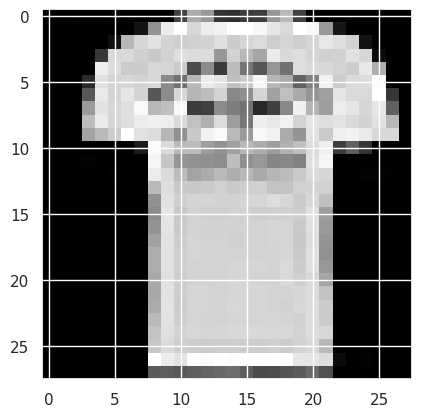

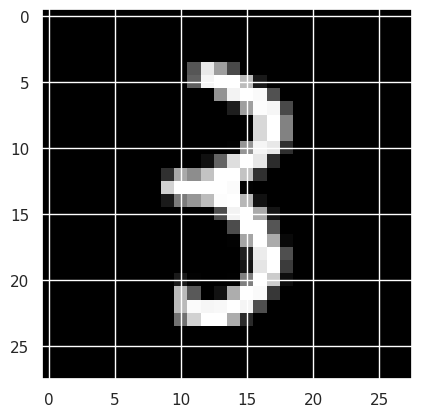

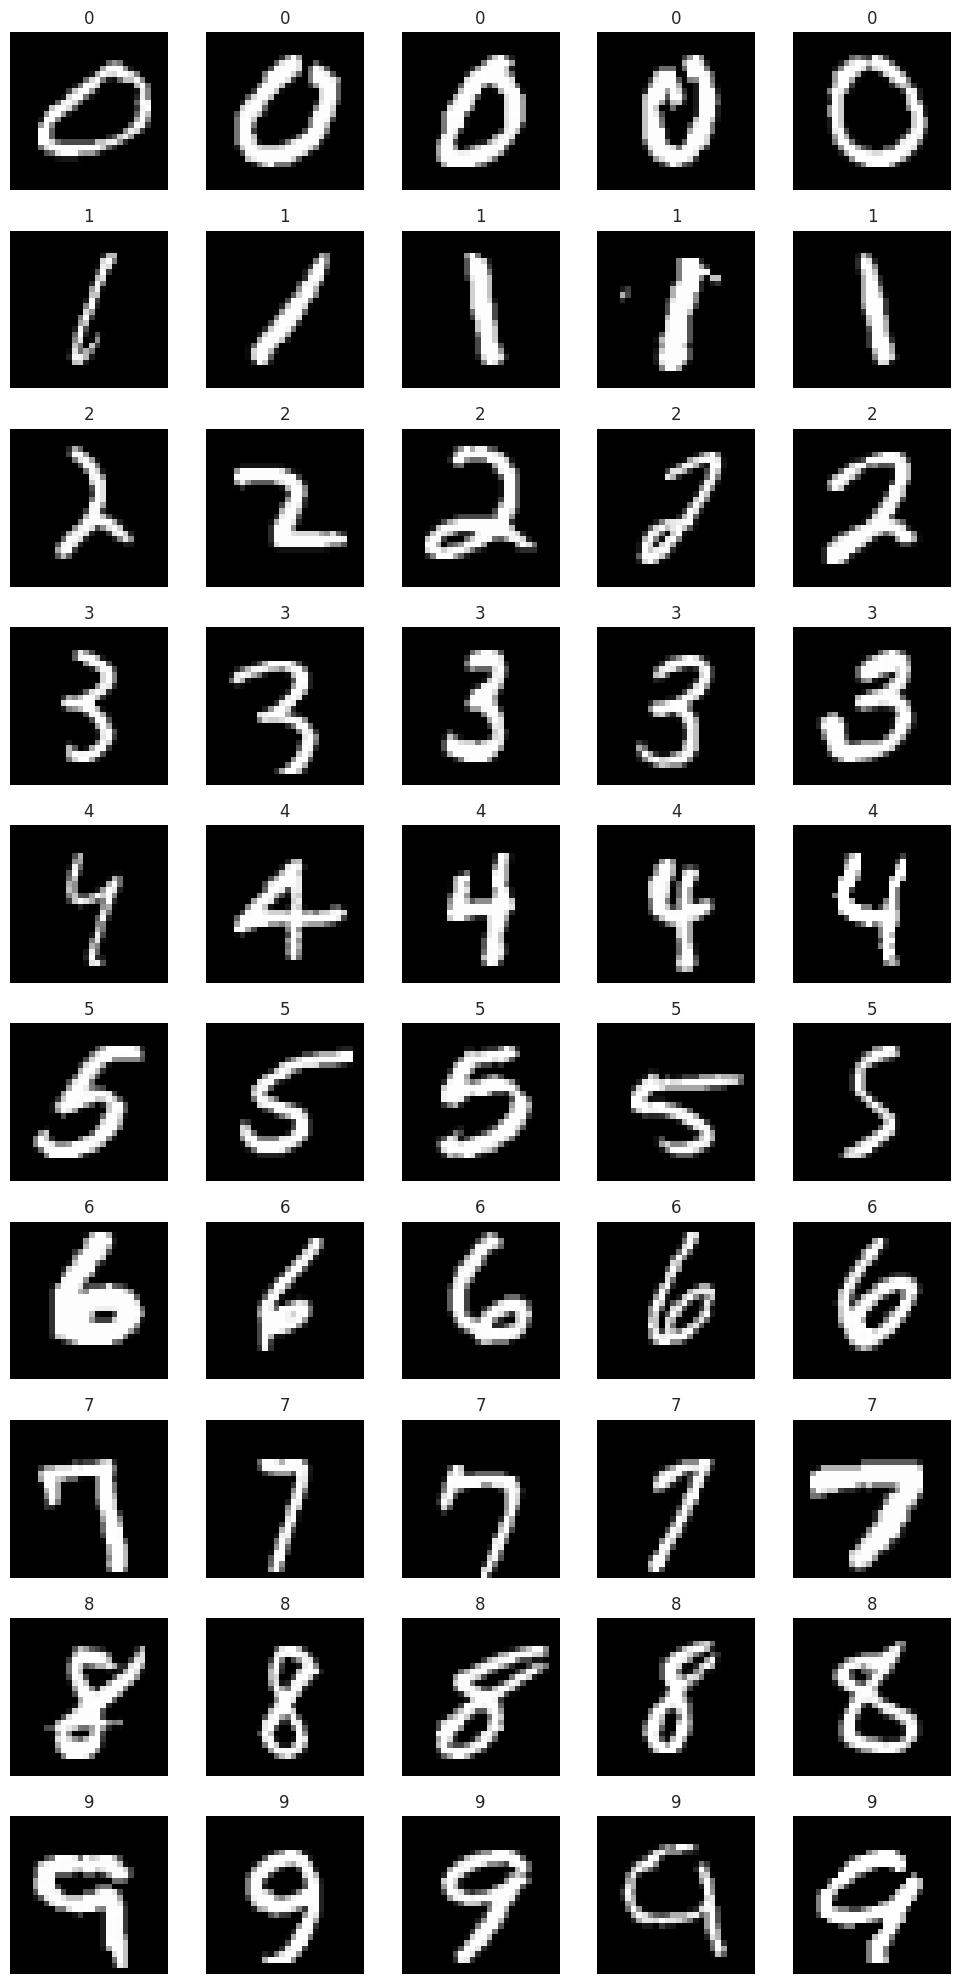

In [ ]:
#display first in X_train_fashion
plt.imshow(X_train_fashion[0], cmap = 'gray')
plt.show()
#display first in X_train_digits
plt.imshow(X_train_digits[0], cmap = 'gray')
plt.show()
#display first 5
fig, axes = plt.subplots(len(label_names), 5, figsize=(10, 20))
for i in range (10):
  class_indices = np.where(Y_train_digits == i)[0][:5]
  for j, img_idx in enumerate(class_indices):
        ax = axes[i, j]
        ax.imshow(X_train_digits[img_idx], cmap = 'gray')
        ax.set_title(i)
        ax.axis("off")
plt.tight_layout()
plt.show()

### Step 4: Modeling

### <span style="color:chocolate">Exercise 2:</span> Define model (20 points)



```
# This is formatted as code
```

1. Fill in the <span style="color:chocolate">build_model()</span> function below, including all the arguments listed in the function definition. Note: the activation function parameter is only for the the hidden layers; use the appropriate final classification function for the final layer.

In [ ]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01,
                metric='metric'):
    """Build a multi-class logistic regression model using Keras.

    Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.
    metric: The desired metric.

    Returns:
    model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    #building the model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    #adding hidden layers
    for i in range(len(hidden_layer_sizes)):
      units = hidden_layer_sizes[i]
      model.add(tf.keras.layers.Dense(
        units=units,                     # output dim
        use_bias=True,              # we included the bias in X
        activation=activation,        # activation already passed
        kernel_initializer=tf.ones_initializer,  # initialize params to 1
      ))

    #adding final layer
    model.add(tf.keras.layers.Dense(
      units=n_classes,                     # output dim
      use_bias=True,              # we included the bias in X
      activation='softmax',        # apply a sigmoid to the output
      kernel_initializer=tf.keras.initializers.Ones(),  # initialize params to 1
    ))

    #choose optimizer based on parameter
    if optimizer.lower() == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer.lower() == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    #compile the model
    model.compile(optimizer = opt, loss='sparse_categorical_crossentropy', metrics=[metric])

    return model

---
### Step 5: Experiments

You can now run a suite of experiments to see how the hyperparameters and layer sizes effect model performance.

The <span style="color:chocolate">train_and_evaluate()</span> function below can be used to run experiments and retrieve results.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the digits model...


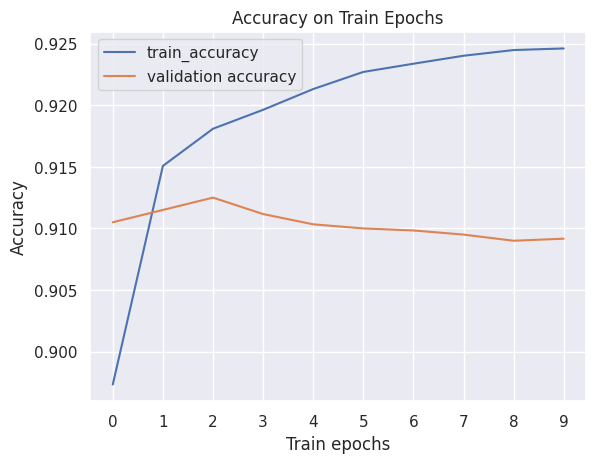

Training accuracy: 0.9246
Validation accuracy: 0.9092


In [ ]:
def train_and_evaluate(data='digits',
                       hidden_layer_sizes=[],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       metric='accuracy',
                       num_epochs=10,
                       showplot=1):

  # Build the model.
    model = build_model(n_classes=10,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      metric=metric,
                      learning_rate=learning_rate,
                      )

  # Select the dataset.
    if data == 'digits':
        X_train = X_train_digits
        X_test = X_test_digits
        Y_train = Y_train_digits
        Y_test = Y_test_digits

    elif data == 'fashion':
        X_train = X_train_fashion
        X_test = X_test_fashion
        Y_train = Y_train_fashion
        Y_test = Y_test_fashion
    else:
        raise 'Unsupported dataset: %s' %data

  # Train the model.
    print('Training the', data, 'model...')
    history = model.fit(
        x=X_train,
        y=Y_train,
        epochs=num_epochs,
        batch_size=64,
        validation_split=0.1,
        verbose=0)

    # Retrieve the training metrics (after each train epoch) and the final validation
    # accuracy.
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    if (showplot == 1):
      plt.plot(train_accuracy, label='train_accuracy')
      plt.plot(val_accuracy, label='validation accuracy')
      plt.xticks(range(num_epochs))
      plt.xlabel('Train epochs')
      plt.ylabel('Accuracy')
      plt.title('Accuracy on Train Epochs')
      plt.legend()
      plt.show()

      print('Training accuracy: %1.4f' %train_accuracy[-1])
      print('Validation accuracy: %1.4f' %val_accuracy[-1])

    return model, train_accuracy[-1], val_accuracy[-1]


# run the function
model = train_and_evaluate()

### <span style="color:chocolate">Exercise 3:</span> Ablation study (50 points)

1. Conduct experiments and record the training and validation set accuracy results in the table below. You may extend the table for additional experiments as needed.
2. Report the hyperparameter values for your preferred architecture configuration.
3. Run the model once more using your preferred hyperparameter configuration.

Data | Hidden sizes | Activation| Optimizer | Learning rate | #Parameters | Training accuracy| Validation accuracy
-|-|-|-|-|-|-|-
 digits | [] | tanh | SGD |0.01| 7850 | |
 digits | [] | relu | SGD |0.01| 7850 | |
 digits | [] | relu | Adam |0.01| 7850 | |
 digits | [128] | relu | Adam |0.01| 101770 | |
 digits | [256, 128] | relu | Adam |0.01| 235146 | |
-|-|-|-|-|-|-|-
 fashion | [] | tanh | SGD |0.01| 7850 | |
 fashion | [] | relu | SGD |0.01| 7850 | |
 fashion | [] | relu | Adam |0.01| 7850 | |
 fashion | [128] | relu | Adam |0.01| 101770 | |
 fashion | [256, 128] | relu | Adam |0.01| 235146 | |

In [ ]:
experiments = [
    {'Data': 'digits', 'Hidden sizes': [], 'Activation': 'tanh', 'Optimizer': 'SGD', 'Learning rate': 0.01, '#Parameters': 7850, 'Training accuracy': None, 'Validation accuracy': None},
    {'Data': 'digits', 'Hidden sizes': [], 'Activation': 'relu', 'Optimizer': 'SGD', 'Learning rate': 0.01, '#Parameters': 7850, 'Training accuracy': None, 'Validation accuracy': None},
    {'Data': 'digits', 'Hidden sizes': [], 'Activation': 'relu', 'Optimizer': 'Adam', 'Learning rate': 0.01, '#Parameters': 7850, 'Training accuracy': None, 'Validation accuracy': None},
    {'Data': 'digits', 'Hidden sizes': [128], 'Activation': 'relu', 'Optimizer': 'Adam', 'Learning rate': 0.01, '#Parameters': 101770, 'Training accuracy': None, 'Validation accuracy': None},
    {'Data': 'digits', 'Hidden sizes': [256, 128], 'Activation': 'relu', 'Optimizer': 'Adam', 'Learning rate': 0.01, '#Parameters': 235146, 'Training accuracy': None, 'Validation accuracy': None},
    {'Data': 'fashion', 'Hidden sizes': [], 'Activation': 'tanh', 'Optimizer': 'SGD', 'Learning rate': 0.01, '#Parameters': 7850, 'Training accuracy': None, 'Validation accuracy': None},
    {'Data': 'fashion', 'Hidden sizes': [], 'Activation': 'relu', 'Optimizer': 'SGD', 'Learning rate': 0.01, '#Parameters': 7850, 'Training accuracy': None, 'Validation accuracy': None},
    {'Data': 'fashion', 'Hidden sizes': [], 'Activation': 'relu', 'Optimizer': 'Adam', 'Learning rate': 0.01, '#Parameters': 7850, 'Training accuracy': None, 'Validation accuracy': None},
    {'Data': 'fashion', 'Hidden sizes': [128], 'Activation': 'relu', 'Optimizer': 'Adam', 'Learning rate': 0.01, '#Parameters': 101770, 'Training accuracy': None, 'Validation accuracy': None},
    {'Data': 'fashion', 'Hidden sizes': [256, 128], 'Activation': 'relu', 'Optimizer': 'Adam', 'Learning rate': 0.01, '#Parameters': 235146, 'Training accuracy': None, 'Validation accuracy': None},
]

for i in range (len(experiments)):

  model, trainacc, valacc = train_and_evaluate(data=experiments[i]['Data'],
                              hidden_layer_sizes=experiments[i]['Hidden sizes'],
                              activation=experiments[i]['Activation'],
                              optimizer=experiments[i]['Optimizer'],
                              learning_rate=experiments[i]['Learning rate'],
                              metric='accuracy',
                              num_epochs=10,
                              showplot = 0
  )
  experiments[i]['Training accuracy'] = trainacc
  experiments[i]['Validation accuracy'] = valacc

  print(experiments[i],'\n')



Training the digits model...
{'Data': 'digits', 'Hidden sizes': [], 'Activation': 'tanh', 'Optimizer': 'SGD', 'Learning rate': 0.01, '#Parameters': 7850, 'Training accuracy': 0.9007962942123413, 'Validation accuracy': 0.903333306312561} 

Training the digits model...
{'Data': 'digits', 'Hidden sizes': [], 'Activation': 'relu', 'Optimizer': 'SGD', 'Learning rate': 0.01, '#Parameters': 7850, 'Training accuracy': 0.9007962942123413, 'Validation accuracy': 0.903333306312561} 

Training the digits model...
{'Data': 'digits', 'Hidden sizes': [], 'Activation': 'relu', 'Optimizer': 'Adam', 'Learning rate': 0.01, '#Parameters': 7850, 'Training accuracy': 0.9246110916137695, 'Validation accuracy': 0.909166693687439} 

Training the digits model...
{'Data': 'digits', 'Hidden sizes': [128], 'Activation': 'relu', 'Optimizer': 'Adam', 'Learning rate': 0.01, '#Parameters': 101770, 'Training accuracy': 0.633648157119751, 'Validation accuracy': 0.6491666436195374} 

Training the digits model...
{'Data':

The best model configuration out of those tested is with 10 epochs, no hidden layers, Adam as the optimizer, learning rate 0.01, and and 7850 parameters.
Training the digits model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


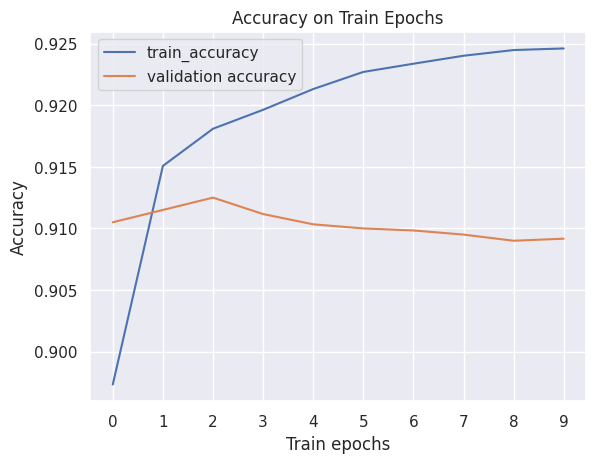

Training accuracy: 0.9246
Validation accuracy: 0.9092
Training the fashion model...


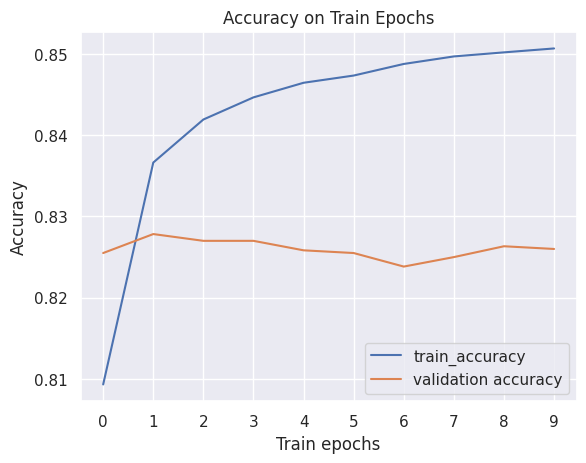

Training accuracy: 0.8507
Validation accuracy: 0.8260


(<Sequential name=sequential, built=True>,
 0.8506666421890259,
 0.8259999752044678)

In [ ]:
print("The best model configuration out of those tested is with 10 epochs, no hidden layers, Adam as the optimizer, learning rate 0.01, and and 7850 parameters.")
train_and_evaluate(activation='relu')
train_and_evaluate(data='fashion',activation='relu')

---
### Step 6: Evaluation and Generalization

### <span style="color:chocolate">Exercise 4:</span> Compute metrics (25 points)

Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

1. Calculate accuracy on both train and test datasets. Note: you will need to convert the vector of predicted probabilities to a class label using the argmax operation. Hint: You can utilize the <span style="color:chocolate">model.predict()</span> method provided by tf.keras and the <span style="color:chocolate">np.max()</span> method available in NumPy; or you can use the <span style="color:chocolate">model.evaluare()</span> method provided by tf.keras directly.

2. Does the model demonstrate strong generalization capabilities? Provide an explanation based on your accuracy observations.

In [ ]:
model_dig,tacc,vacc = train_and_evaluate(activation='relu', showplot=0)
dig_train_acc = model_dig.evaluate(X_train_digits, Y_train_digits)[1]
print("Digits Train Accuracy: ", dig_train_acc)
dig_test_acc = model_dig.evaluate(X_test_digits, Y_test_digits)[1]
print("Digits Test Accuracy: ", dig_test_acc)
model_fash,tacc,vacc = train_and_evaluate(data='fashion',activation='relu', showplot=0)
fash_train_acc = model_fash.evaluate(X_train_fashion, Y_train_fashion)[1]
print("Fashion Train Accuracy: ", fash_train_acc)
fash_test_acc = model_fash.evaluate(X_test_fashion, Y_test_fashion)[1]
print("Fashion Test Accuracy: ", fash_test_acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the digits model...
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9253 - loss: 0.2746
Digits Train Accuracy:  0.9229833483695984
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9016 - loss: 0.3835
Digits Test Accuracy:  0.9133999943733215
Training the fashion model...
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8561 - loss: 0.4220
Fashion Train Accuracy:  0.8535666465759277
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8253 - loss: 0.5475
Fashion Test Accuracy:  0.8252999782562256


In [ ]:
print("The model demonstrates strong generalization capabilities across both datasets.")
print("For each dataset, the train and test accuracies are very similar, and differ by nearly the same amount.")
print("For an unknown dataset, it performs similar to how it did on the trained dataset. This indicates that it can generalize well.")

The model demonstrates strong generalization capabilities across both datasets.
For each dataset, the train and test accuracies are very similar, and differ by nearly the same amount.
For an unknown dataset, it performs similar to how it did on the trained dataset. This indicates that it can generalize well.
